In [1]:
from simulation_core import *
import simpy

## What do i want from this simulation?

- A plot of the distribution of the arrival times, for presentation reasons
- A plot showing the differences of the average waiting times between the number of the buses

In [2]:
CAPACITA_NAVETTA = 25  # Numero di passeggeri che una navetta può trasportare
TRAVEL_TIME = 15    # Tempo di viaggio in minuti
MAX_PASSENGERS = 500  # Numero massimo di passeggeri che possono essere generati
BASE_LAMBDA = 1 # Regulates the average arrival rate of passengers (1/lambda is the average time between arrivals)
SIMULATION_TIME = 240
PEAK_HOUR = 150  # L'ora di punta, ad es. il 120° minuto
PEAK_FACTOR = 5 # Fattore di aumento del tasso di arrivo durante l'ora di punta
SMART_PERCENTAGE = 0.5  # Soglia oltre la quale il driver può decidere di partire anche se non è pieno
SMART_TIME = 10  # Tempo massimo che una navetta può aspettare prima di partire anche se non è piena
SMART_DRIVER = True
NUM_NAVETTE_TOTALI = 4 # Numero totale di navette disponibili

smart_driver = [False]
max_passengers = [500, 1000, 1500, 2000]  # Diverse configurazioni per il numero massimo di passeggeri
bus_amount  = [1,2,3,4,5,6,7,8]
configurations = []

# Esegui la simulazione per diverse configurazioni di navette e smart driver
for NUM_NAVETTE_TOTALI in bus_amount :
    for MAX_PASSENGERS in smart_driver:
                # Crea una nuova configurazione per ogni combinazione di parametri
                configuration = Configuration(NUM_NAVETTE_TOTALI, SMART_DRIVER, SMART_TIME, SMART_PERCENTAGE, MAX_PASSENGERS)
                for i in range(10):  # Esegui 100 simulazioni per ogni configurazione

                    env = simpy.Environment()

                    # Questa è la coda dove i passeggeri si accodano appena arrivano
                    passenger_queue = simpy.Store(env) 

                    # Questo Store gestisce quale navetta è ATTIVA per l'imbarco in un dato momento
                    # Ha capacità 1, quindi solo UNA navetta può essere messa qui alla volta.
                    # Le navette "competono" per essere qui.
                    bus_attivi_per_imbarco = simpy.Store(env, capacity=1)

                    # Avvia i processi delle navette
                    for i in range(NUM_NAVETTE_TOTALI):
                        navetta_obj = Navetta(env, f'Bus_{i+1}', CAPACITA_NAVETTA)
                        env.process(processo_navetta(env, navetta_obj, bus_attivi_per_imbarco, passenger_queue,
                                                        SMART_DRIVER= SMART_DRIVER,
                                                            SMART_TIME=SMART_TIME,
                                                                SMART_PERCENTAGE=SMART_PERCENTAGE,
                                                                    TRAVEL_TIME=TRAVEL_TIME))

                    # Avvia il generatore di clienti
                    history = []  # Lista per tenere traccia dei clienti per il report finale
                    env.process(generatore_clienti(env, passenger_queue, history,
                                                    tempo_massimo_simulazione=SIMULATION_TIME,
                                                        MAX_PASSENGERS=MAX_PASSENGERS,
                                                            PEAK_HOUR=PEAK_HOUR,
                                                                BASE_LAMBDA=BASE_LAMBDA,
                                                                    PEAK_FACTOR=PEAK_FACTOR))

                    # Esegui la simulazione
                    print(f'--- Simulation started for {SIMULATION_TIME} minutes ---')
                    env.run(until=SIMULATION_TIME)
                    print('--- Simulation end ---')

                    configuration.history.append(history)  # Salva la storia dei passeggeri nella configurazione
                configurations.append(configuration)

--- Simulation started for 240 minutes ---

0.00: Bus_1 is at the stop and active for boarding.
--- Simulation end ---
--- Simulation started for 240 minutes ---

0.00: Bus_1 is at the stop and active for boarding.
--- Simulation end ---
--- Simulation started for 240 minutes ---

0.00: Bus_1 is at the stop and active for boarding.
--- Simulation end ---
--- Simulation started for 240 minutes ---

0.00: Bus_1 is at the stop and active for boarding.
--- Simulation end ---
--- Simulation started for 240 minutes ---

0.00: Bus_1 is at the stop and active for boarding.
--- Simulation end ---
--- Simulation started for 240 minutes ---

0.00: Bus_1 is at the stop and active for boarding.
--- Simulation end ---
--- Simulation started for 240 minutes ---

0.00: Bus_1 is at the stop and active for boarding.
--- Simulation end ---
--- Simulation started for 240 minutes ---

0.00: Bus_1 is at the stop and active for boarding.
--- Simulation end ---
--- Simulation started for 240 minutes ---

0.00

(array([ 4.,  4.,  3.,  2.,  3.,  3.,  4.,  3.,  5.,  5.,  5.,  3.,  2.,
         7.,  7.,  7.,  8.,  5.,  5.,  2.,  9.,  5.,  9.,  6., 14.,  8.,
        11., 14.,  9.,  8.,  6., 10., 14., 11., 12., 12., 17., 14., 11.,
        18.,  9., 20., 15., 17., 27., 19., 17., 23., 22., 26.]),
 array([1.12000121e-01, 3.36633707e+00, 6.62067401e+00, 9.87501096e+00,
        1.31293479e+01, 1.63836849e+01, 1.96380218e+01, 2.28923587e+01,
        2.61466957e+01, 2.94010326e+01, 3.26553696e+01, 3.59097065e+01,
        3.91640435e+01, 4.24183804e+01, 4.56727174e+01, 4.89270543e+01,
        5.21813913e+01, 5.54357282e+01, 5.86900652e+01, 6.19444021e+01,
        6.51987390e+01, 6.84530760e+01, 7.17074129e+01, 7.49617499e+01,
        7.82160868e+01, 8.14704238e+01, 8.47247607e+01, 8.79790977e+01,
        9.12334346e+01, 9.44877716e+01, 9.77421085e+01, 1.00996445e+02,
        1.04250782e+02, 1.07505119e+02, 1.10759456e+02, 1.14013793e+02,
        1.17268130e+02, 1.20522467e+02, 1.23776804e+02, 1.27031141e+

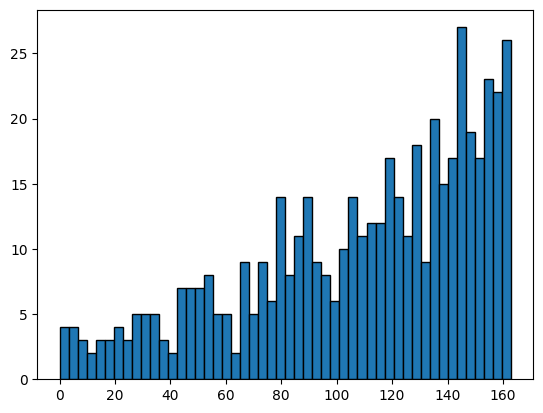

In [10]:
import matplotlib.pyplot as plt

# Plot the number of passengers boarded over time
times = [p.time_arrival for p in history]
plt.hist(times, bins=50, edgecolor='black')

In [11]:
average_waiting_times = []
for config in configurations:
    print(f'Configurazione: {config.num_navette} navette, Smart Driver: {config.smart_driver}, Smart Time: {config.smart_time}, Smart Percentage: {config.smart_percentage}')
    total_passengers = sum(len(history) for history in config.history)
    print(f'Totale passeggeri imbarcati: {total_passengers}')
    average_waiting_times.append(sum(p.time_departure - p.time_arrival for history in config.history for p in history if p.time_departure is not None) / total_passengers)
    print(f'Tempo medio di attesa per i passeggeri: {average_waiting_times[-1]:.2f} minuti')

Configurazione: 1 navette, Smart Driver: False, Smart Time: 10, Smart Percentage: 0.5
Totale passeggeri imbarcati: 5000
Tempo medio di attesa per i passeggeri: 26.04 minuti
Configurazione: 2 navette, Smart Driver: False, Smart Time: 10, Smart Percentage: 0.5
Totale passeggeri imbarcati: 5000
Tempo medio di attesa per i passeggeri: 12.74 minuti
Configurazione: 3 navette, Smart Driver: False, Smart Time: 10, Smart Percentage: 0.5
Totale passeggeri imbarcati: 5000
Tempo medio di attesa per i passeggeri: 5.07 minuti
Configurazione: 4 navette, Smart Driver: False, Smart Time: 10, Smart Percentage: 0.5
Totale passeggeri imbarcati: 5000
Tempo medio di attesa per i passeggeri: 3.91 minuti
Configurazione: 5 navette, Smart Driver: False, Smart Time: 10, Smart Percentage: 0.5
Totale passeggeri imbarcati: 5000
Tempo medio di attesa per i passeggeri: 3.91 minuti
Configurazione: 6 navette, Smart Driver: False, Smart Time: 10, Smart Percentage: 0.5
Totale passeggeri imbarcati: 5000
Tempo medio di att

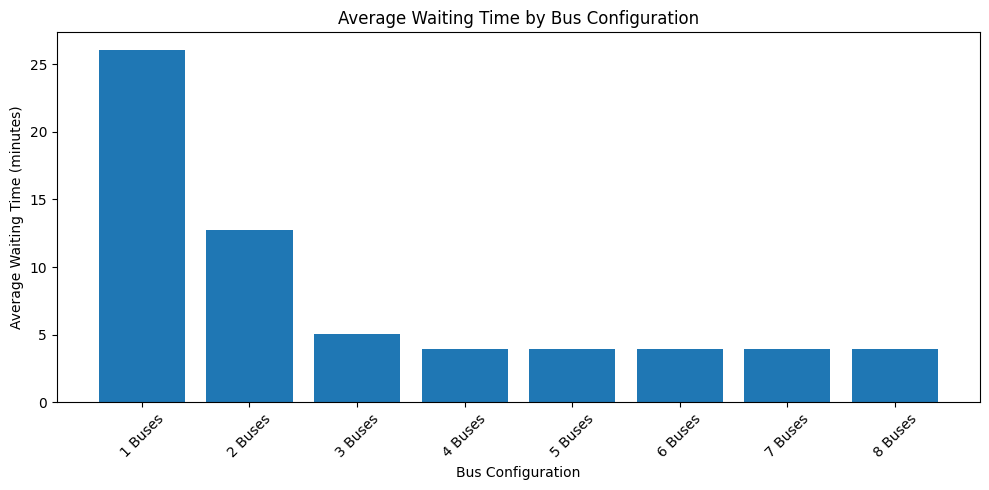

In [15]:
# Plot the average waiting times for each configuration
plt.figure(figsize=(10, 5))
plt.bar([f'{config.num_navette} Buses' for config in configurations], average_waiting_times)
plt.xlabel('Bus Configuration')
plt.ylabel('Average Waiting Time (minutes)')
plt.title('Average Waiting Time by Bus Configuration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# print maximum waiting time for each configuration and the arrival time of the maximum waiting time
print("\nMassimo tempo di attesa per ogni configurazione:")
for config in configurations:
    for history in config.history:
        curren_max = None
        for p in history:
            if p.time_departure is not None:
                waiting_time = p.time_departure - p.time_arrival
                if curren_max is None or waiting_time > curren_max[0]:
                    curren_max = (waiting_time, p.time_arrival, config.num_navette, config.smart_driver, config.smart_time, config.smart_percentage)
        print(f'maximum waiting time: {curren_max[0]:.2f} minutes, arrival time: {curren_max[1]:.2f} minutes, configuration: {curren_max[2]} buses, smart driver: {curren_max[3]}, smart time: {curren_max[4]}, smart percentage: {curren_max[5]}')



Massimo tempo di attesa per ogni configurazione:
maximum waiting time: 96.24 minutes, arrival time: 142.03 minutes, configuration: 1 buses, smart driver: False, smart time: 10, smart percentage: 0.5
maximum waiting time: 91.95 minutes, arrival time: 136.43 minutes, configuration: 1 buses, smart driver: False, smart time: 10, smart percentage: 0.5
maximum waiting time: 97.24 minutes, arrival time: 136.47 minutes, configuration: 1 buses, smart driver: False, smart time: 10, smart percentage: 0.5
maximum waiting time: 86.68 minutes, arrival time: 139.65 minutes, configuration: 1 buses, smart driver: False, smart time: 10, smart percentage: 0.5
maximum waiting time: 88.46 minutes, arrival time: 140.56 minutes, configuration: 1 buses, smart driver: False, smart time: 10, smart percentage: 0.5
maximum waiting time: 81.05 minutes, arrival time: 144.60 minutes, configuration: 1 buses, smart driver: False, smart time: 10, smart percentage: 0.5
maximum waiting time: 99.96 minutes, arrival time: